In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from a CSV file
df = pd.read_csv("T:/Data/Ecommerce_Consumer_Behavior_Analysis_Data.csv")
df.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,80-684-5072,32,Male,High,Married,High School,Middle,Rokytne,Animal Fe,$79.81,...,9,High,Smartphone,Debit Card,7/16/2024,False,True,Wants-based,Standard,14
1,20-817-9584,42,Male,Middle,Widowed,Master's,Middle,Alfeizerão,Animal Fe,$169.28,...,1,Low,Tablet,Cash,6/17/2024,True,True,Impulsive,No Preference,6
2,72-431-5021,35,Female,High,Married,Master's,High,Oeiras,Animal Fe,$427.48,...,1,Low,Smartphone,Debit Card,12/16/2024,True,False,Impulsive,Standard,11
3,35-192-9050,32,Female,Middle,Married,Bachelor's,High,Hunkuyi,Animal Fe,$395.97,...,6,Low,Tablet,Debit Card,8/18/2024,True,True,Wants-based,Standard,1
4,05-857-1572,23,Female,Middle,Widowed,Bachelor's,High,Rakszawa,Animal Fe,$421.95,...,1,NaN,Smartphone,Other,3/18/2024,False,True,Need-based,No Preference,7


In [165]:
# Remove '$' sign and convert 'Purchase_Amount' to float
df["Purchase_Amount"] = df["Purchase_Amount"].replace('[\$,]', '', regex=True).astype(float)

# Check for missing values
missing_values = df.isnull().sum()

# Display updated info
df.info(), missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            321 non-null    object 
 1   Age                                    321 non-null    int64  
 2   Gender                                 321 non-null    object 
 3   Income_Level                           321 non-null    object 
 4   Marital_Status                         321 non-null    object 
 5   Education_Level                        321 non-null    object 
 6   Occupation                             321 non-null    object 
 7   Location                               321 non-null    object 
 8   Purchase_Category                      321 non-null    object 
 9   Purchase_Amount                        321 non-null    float64
 10  Frequency_of_Purchase                  321 non-null    int64  
 11  Purcha

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\linga\AppData\Local\Temp\ipykernel_25500\2599305046.py:2: SyntaxWarning: invalid escape sequence '\$'
  df["Purchase_Amount"] = df["Purchase_Amount"].replace('[\$,]', '', regex=True).astype(float)


(None,
 Customer_ID                               0
 Age                                       0
 Gender                                    0
 Income_Level                              0
 Marital_Status                            0
 Education_Level                           0
 Occupation                                0
 Location                                  0
 Purchase_Category                         0
 Purchase_Amount                           0
 Frequency_of_Purchase                     0
 Purchase_Channel                          0
 Brand_Loyalty                             0
 Product_Rating                            0
 Time_Spent_on_Product_Research(hours)     0
 Social_Media_Influence                   81
 Discount_Sensitivity                      0
 Return_Rate                               0
 Customer_Satisfaction                     0
 Engagement_with_Ads                      83
 Device_Used_for_Shopping                  0
 Payment_Method                            0
 Ti

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
df.isnull().sum()

# No missing values in this dataset, but let's check for any duplicates
df.duplicated().sum()

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

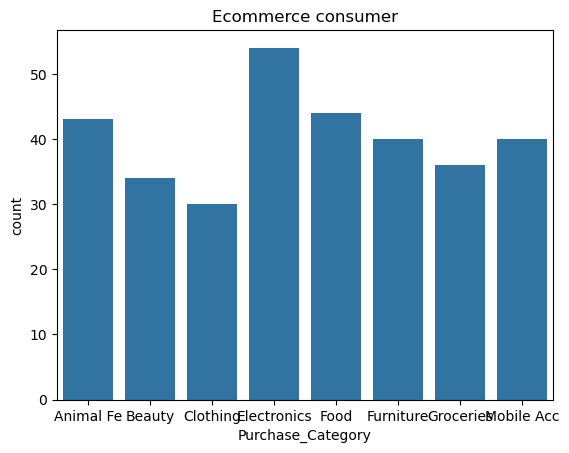

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Purchase_Category', data=df)
plt.title('Ecommerce consumer')
plt.show()

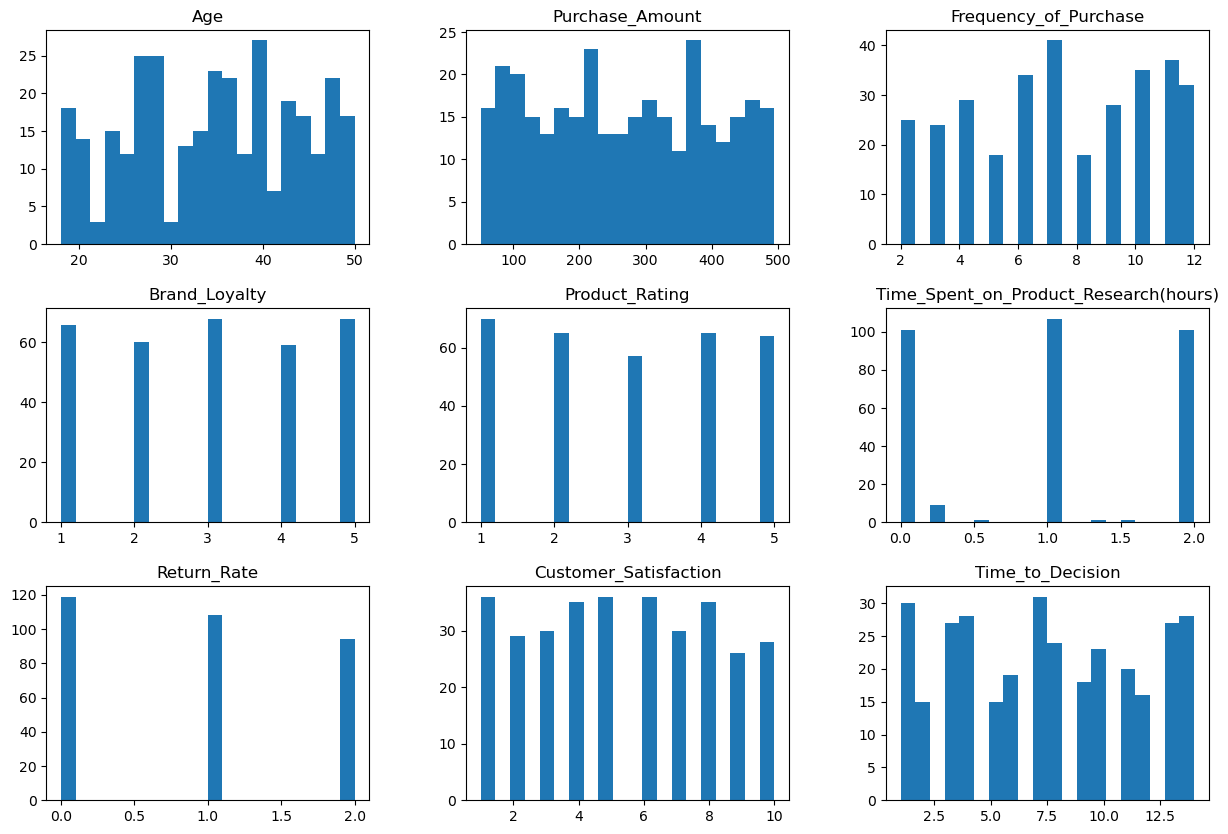

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=20, figsize=(15, 10), grid=False)
plt.show()

C:\Users\linga\AppData\Local\Temp\ipykernel_25500\1812413285.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(top_categories.index, rotation=45)


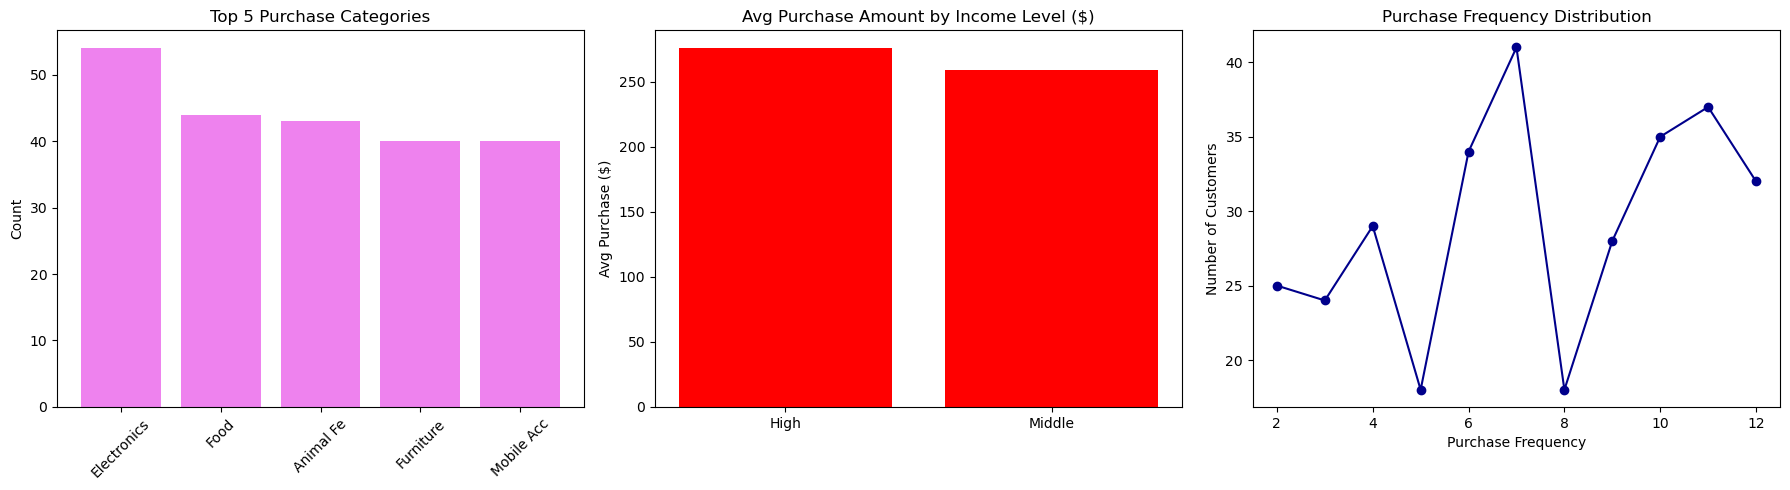

In [173]:
import matplotlib.pyplot as plt

# Top 5 most common purchase categories
top_categories = df["Purchase_Category"].value_counts().head(5)

# Average purchase amount by income level
avg_purchase_by_income = df.groupby("Income_Level")["Purchase_Amount"].mean()

# Purchase frequency distribution
purchase_frequency = df["Frequency_of_Purchase"].value_counts().sort_index()

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Top Purchase Categories
axes[0].bar(top_categories.index, top_categories.values, color="violet")
axes[0].set_title("Top 5 Purchase Categories")
axes[0].set_ylabel("Count")
axes[0].set_xticklabels(top_categories.index, rotation=45)

# Average Purchase Amount by Income Level
axes[1].bar(avg_purchase_by_income.index, avg_purchase_by_income.values, color="red")
axes[1].set_title("Avg Purchase Amount by Income Level ($)")
axes[1].set_ylabel("Avg Purchase ($)")

# Purchase Frequency Distribution
axes[2].plot(purchase_frequency.index, purchase_frequency.values, marker="o", linestyle="-", color="darkblue")
axes[2].set_title("Purchase Frequency Distribution")
axes[2].set_xlabel("Purchase Frequency")
axes[2].set_ylabel("Number of Customers")

plt.tight_layout()
plt.show()

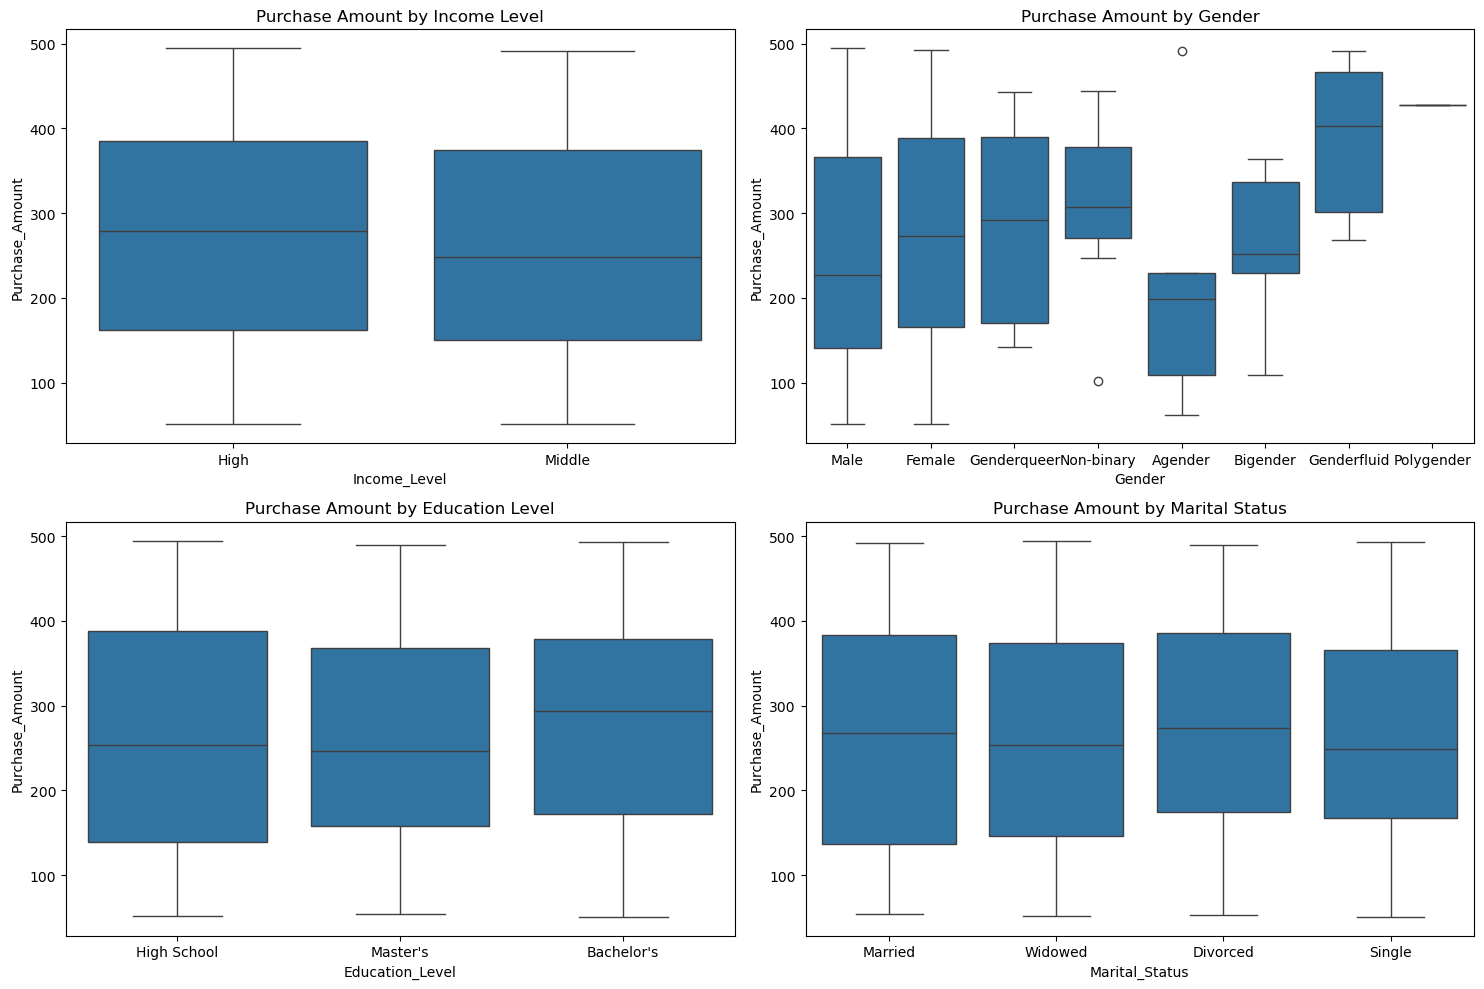

In [175]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='Income_Level', y='Purchase_Amount', data=df)
plt.title('Purchase Amount by Income Level')

plt.subplot(2, 2, 2)
sns.boxplot(x='Gender', y='Purchase_Amount', data=df)
plt.title('Purchase Amount by Gender')

plt.subplot(2, 2, 3)
sns.boxplot(x='Education_Level', y='Purchase_Amount', data=df)
plt.title('Purchase Amount by Education Level')

plt.subplot(2, 2, 4)
sns.boxplot(x='Marital_Status', y='Purchase_Amount', data=df)
plt.title('Purchase Amount by Marital Status')

plt.tight_layout()
plt.show()

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("T:/Data/Ecommerce_Consumer_Behavior_Analysis_Data.csv")
df.describe()

,Age,Frequency_of_Purchase,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Return_Rate,Customer_Satisfaction,Time_to_Decision
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,34.666667,7.339564,3.009346,2.962617,0.980841,0.922118,5.370717,7.470405
std,9.122660,3.150391,1.430660,1.442168,0.804489,0.812121,2.814519,4.151042
min,18.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,27.000000,5.000000,2.000000,2.000000,0.000000,0.000000,3.000000,4.000000
50%,35.000000,7.000000,3.000000,3.000000,1.000000,1.000000,5.000000,7.000000
75%,42.000000,10.000000,4.000000,4.000000,2.000000,2.000000,8.000000,11.000000
max,50.000000,12.000000,5.000000,5.000000,2.000000,2.000000,10.000000,14.000000


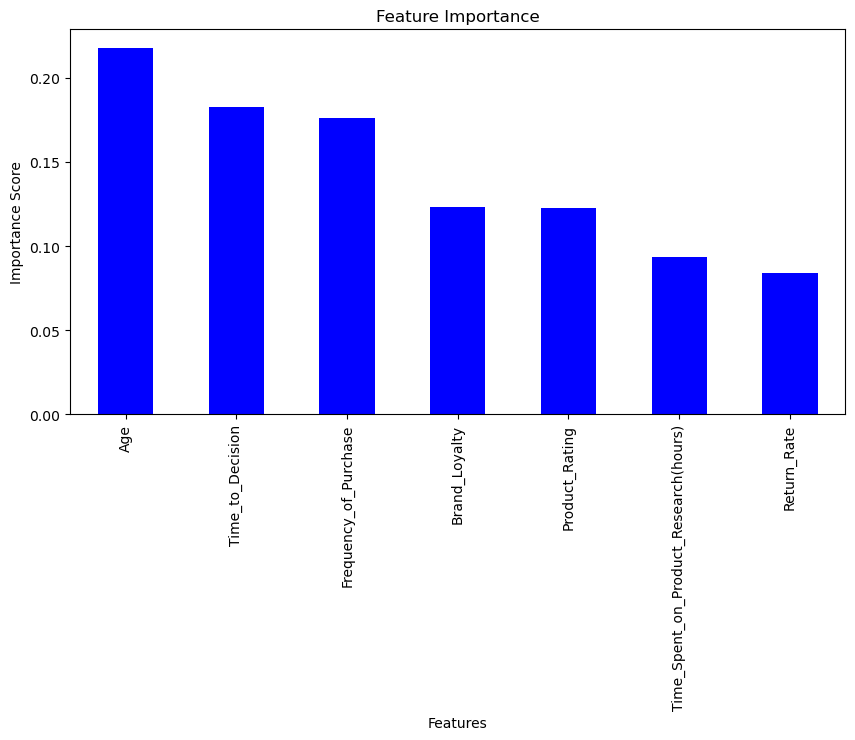

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("T:/Data/Ecommerce_Consumer_Behavior_Analysis_Data.csv")

# Drop non-numeric columns or encode categorical variables
df = df.select_dtypes(include=['number'])  # Keep only numerical columns

# Define features (X) and target (y)
X = df.drop(columns=['Customer_Satisfaction'], errors='ignore')  # Example of target selection
y = df['Customer_Satisfaction']  # You can change this to another target if needed

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature Importance Visualization
importance = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 5))
importance.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()